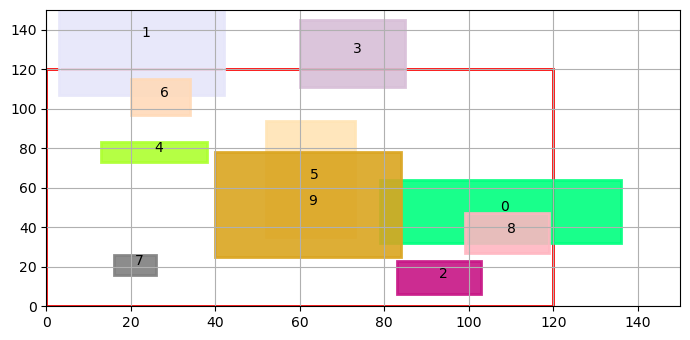

0

In [3]:
from util import *
import random
# a = generate_participant()


layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

arena       = generate_unconnected_participants(10, layout_zone, 5)

plot_participants(layout_zone, arena, 150, 150)


In [5]:
import matplotlib.colors as mcolors

colors = list(mcolors.CSS4_COLORS.keys())

colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [35]:
ov, _ = calculate_overlap(arena['1'], arena['2'])

ov

{}

In [6]:
edges = [True, False, True, False]

protruded_zone_edges             = [edge 
                                    for i,edge in enumerate(['north', 'west', 'east', 'south']) 
                                    if edges[i]]

protruded_zone_edges

['north', 'east']

In [12]:
[1] + []

[1]

In [14]:
calculate_protrusion(layout_zone, arena['0'])

('prone', (-1, 7))

In [15]:
arena['0']

{'idx': '0',
 'xmin': 80,
 'ymin': -7,
 'width': 41,
 'height': 24,
 'clashes': {},
 'aversions': {},
 'inference': 0,
 'connections': {},
 'turmoil': 0,
 'wounds': [],
 'freespace': {},
 'secondary-freespace-north-east': {},
 'secondary-freespace-south-east': {},
 'secondary-freespace-south-west': {},
 'secondary-freespace-north-west': {}}

In [26]:
participant = arena.pop('2')

p2 = arena.pop('1')

In [28]:
p1n = hustle(participant, p2)

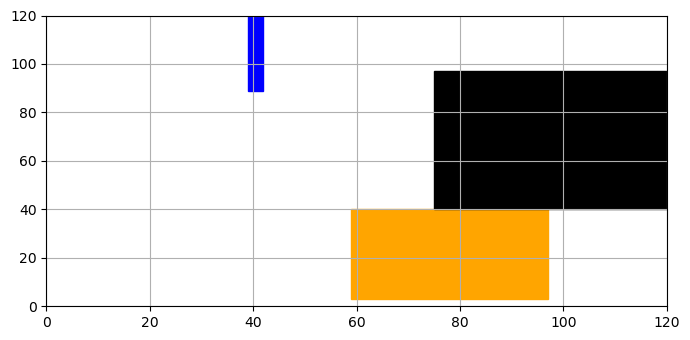

0

In [29]:
p2['xmin'] = p1n[0]
p2['ymin'] = p1n[1]

arena['2'] = participant

arena['1'] = p2

plot_participants(arena)

In [33]:
calculate_overlap(arena['0'], arena['1'])

({}, [False, False, False, False, False, False])

In [ ]:
free_edges = ['north','west', 'east', 'south']


calclulate_free_space(participant, free_edges, arena, layout_zone)

In [ ]:
arena['2']

In [ ]:
a = [1]

if a:
    print('1')
else:
    print('2')

In [ ]:
superior_dict = {
    'dict1': {'key1': 'value1', 'key2': 1, 'key3': 2},
    'dict2': {'key1': 'value4', 'key2': 5, 'key3': 2},
    'dict3': {'key1': 'value7', 'key2': 1, 'key3': 2},
}

key_to_retrieve = 'key2'

width = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

key_to_retrieve = 'key3'

height = [sub_dict.get(key_to_retrieve) for sub_dict in superior_dict.values()]

area = sum([a * b for a, b in zip(width, height)])

print(area)

In [ ]:
calculate_euclidean_distance(arena['0'], arena['1'])

In [ ]:
boolean_list = [False, True, False, False]

if any(boolean_list):
    print("At least one value is True.")
else:
    print("All values are False.")